In [1]:
%matplotlib inline
import numpy as np
import bomeba0 as bmb

The first thing we do to use bomeba is to create a protein object. At this point we can only do this by specifying an aminoacidic sequence, like this:

In [2]:
prot = bmb.Protein('GAG')

A protein object has several attributes for example we can retrieve the sequence

In [3]:
prot.sequence

'GAG'

or the cartesian coordinates

In [4]:
prot.coords

array([[-1.19500005,  0.20100001, -0.206     ],
       [ 0.23      ,  0.31799999, -0.50199997],
       [ 1.05900002, -0.38999999,  0.542     ],
       [ 0.54500002, -0.97500002,  1.49899995],
       [-1.55799997, -0.333     ,  0.66000003],
       [ 0.48199999,  1.33700001, -0.514     ],
       [ 0.43399999, -0.15899999, -1.47899997],
       [ 2.34725648, -0.28422738,  0.27440431],
       [ 3.14906259, -0.96900264,  1.28415767],
       [ 4.62267437, -0.84767082,  0.97752639],
       [ 5.03890863, -0.22680487, -0.00789004],
       [ 2.67180522, -2.43091278,  1.34657687],
       [ 2.79649566,  0.22797208, -0.56379358],
       [ 2.97612006, -0.48359174,  2.26198234],
       [ 1.59890959, -2.50156456,  1.60909417],
       [ 2.80237096, -2.953343  ,  0.37987772],
       [ 3.22350334, -3.0120278 ,  2.10759223],
       [ 5.34762693, -1.46681   ,  1.89049433],
       [ 6.772499  , -1.34949122,  1.59400489],
       [ 7.60201491, -2.05732684,  2.6377065 ],
       [ 7.08847382, -2.64245661,  3.594

We can also compute the energy of our protein. At the moment the energy is computed in vacumm, with a very simple force-field that only includes a Lenard-Joness potential and use only four atoms (C,H,O,N).

In [5]:
prot.energy()

62.66593634230137

We can ask for the lenght of our protein (in terms of amino acids)

In [6]:
len(prot)

3

We can ask for the coordinates of individuals atoms

In [7]:
CA_0 = prot.at_coords(0, 'CA')
CA_1 = prot.at_coords(1, 'CA')

And we can use those coordinates to compute, for example, distances.

In [8]:
bmb.utils.dist(CA_0, CA_1)

3.6561812391900586

We can ask for all the torsional angles in our molecule, 

In [9]:
prot.get_torsionals(sidechain=False)

,phi,psi
0,NaN,180.0
1,-180.0,180.0
2,-180.0,NaN


and we can change them!

In [10]:
prot.set_phi(1, -60)
prot.set_psi(1, -40)

and we can plot a minimalistic ramachadran!

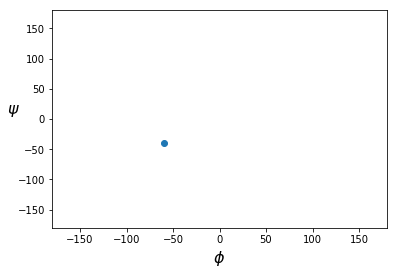

In [11]:
bmb.plot_ramachandran(prot);